In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-job-salaries/ds_salaries.csv


In [2]:
data = pd.read_csv('/kaggle/input/data-science-job-salaries/ds_salaries.csv')
data.head(20)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [4]:
# Sadece sayısal veri türlerini içeren sütunları seçtik
data_numeric = data.select_dtypes(include=[np.number])

# Sayısal veriler üzerinde korelasyon hesapladık
data_numeric.corr()


,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
Unnamed: 0,1.000000,0.886550,-0.096250,0.167025,0.095000
work_year,0.886550,1.000000,-0.087577,0.170493,0.076314
salary,-0.096250,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.167025,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.095000,0.076314,-0.014608,0.132122,1.000000


In [5]:
data['salary_currency'].unique() # Tek bir para biriminde çalışma yapmak için tüm para birimlerini listeledik ve veri setimizdeki
#tüm para birimlerini dönüştürerek dolar bazında değerlendirecez.

array(['EUR', 'USD', 'GBP', 'HUF', 'INR', 'JPY', 'CNY', 'MXN', 'CAD',
       'DKK', 'PLN', 'SGD', 'CLP', 'BRL', 'TRY', 'AUD', 'CHF'],
      dtype=object)

In [6]:
# Güncel döviz kurları
currency_rates_to_usd = {
    'EUR': 1.1,  # 1 Euro = 1.1 USD
    'GBP': 1.3,  # 1 Sterlin = 1.3 USD
    'INR': 0.01,  # 1 Hindistan Rupisi = 0.01 USD
    'HUF': 0.003,  # 1 Macar Forinti = 0.0033 USD
    'JPY': 0.0006,  # 1 Japon Yeni = 0.006 USD
    'CNY': 0.014,  # 1 Çin yuanı = 0.014 USD
    'MXN': 0.059,  # 1 Mexica pesosu = 0.059 USD
    'CAD': 0.74,  # 1 Kanada doları = 0.74 USD
    'DKK': 0.14,  # 1 Danimarka kronu = 0.14 USD
    'PLN': 0.25,  # 1 Polonya zlotisi = 0.25 USD
    'SGD': 0.74,  # 1 Singapur doları = 0.74 USD
    'CLP': 0.0010,  # 1 Şili pesosu = 0.0010 USD
    'BRL': 0.20,  # 1 Brezilya reali = 0.20 USD
    'TRY': 0.032,  # 1 Türk lirası = 0.032 USD
    'AUD': 0.65,  # 1 Avustralya doları = 0.65 USD
    'CHF': 1.13,  # 1 İsviçre frangı = 1.13 USD
    'USD': 1  # USD'yi de eklemek iyi bir pratiktir
}

# Maaşları USD'ye çeviren fonksiyon
def convert_salary_to_usd(row):
    currency = row['salary_currency']
    salary = row['salary']
    rate = currency_rates_to_usd.get(currency, None)  # Para birimi sözlükte yoksa None dönecek
    if rate is not None:
        return salary * rate
    else:
        return None  # Döviz kuru bilinmiyorsa None değeri dönecek

# Yeni bir sütun oluşturup dönüştürülmüş maaşları atadık
data['salary_in_usd_converted'] = data.apply(convert_salary_to_usd, axis=1)

# Sonuçları kontrol etmek için ilk birkaç satırı gösterdik
data[['salary', 'salary_currency', 'salary_in_usd_converted']].head()

,salary,salary_currency,salary_in_usd_converted
0,70000,EUR,77000.0
1,260000,USD,260000.0
2,85000,GBP,110500.0
3,20000,USD,20000.0
4,150000,USD,150000.0


Yukarıda salary_in_usd_converted başlığı için yazdığım kodu Try olarak güncelliyorum
çünkü salary_in_usd bizim istediğimiz dönüşümü zaten yapmış :) TRY'nin dolar bazında 
kurunu diğer kurlara bölersek istediğimiz dönüşüm yapılacak tek tek kurları güncellemekten bu şekilde kaçınabiliriz.

In [7]:
# Güncel döviz kurları, USD'ye göre. TRY'ye çevirme için USD'den TRY'ye dönüşüm oranını kullanacağız.
currency_rates_to_try = {
    'EUR': 1.1 / 0.032,  # Euro'dan TRY'ye dönüşüm oranı
    'GBP': 1.3 / 0.032,  # Sterlin'den TRY'ye dönüşüm oranı
    'INR': 0.01 / 0.032,  # Hindistan Rupisi'nden TRY'ye dönüşüm oranı
    'HUF': 0.003 / 0.032,  # Macar Forinti'nden TRY'ye dönüşüm oranı
    'JPY': 0.0006 / 0.032,  # Japon Yeni'nden TRY'ye dönüşüm oranı
    'CNY': 0.014 / 0.032,  # Çin Yuanı'ndan TRY'ye dönüşüm oranı
    'MXN': 0.059 / 0.032,  # Meksika Pesosu'ndan TRY'ye dönüşüm oranı
    'CAD': 0.74 / 0.032,  # Kanada Doları'ndan TRY'ye dönüşüm oranı
    'DKK': 0.14 / 0.032,  # Danimarka Kronu'ndan TRY'ye dönüşüm oranı
    'PLN': 0.25 / 0.032,  # Polonya Zlotisi'nden TRY'ye dönüşüm oranı
    'SGD': 0.74 / 0.032,  # Singapur Doları'ndan TRY'ye dönüşüm oranı
    'CLP': 0.0010 / 0.032,  # Şili Pesosu'ndan TRY'ye dönüşüm oranı
    'BRL': 0.20 / 0.032,  # Brezilya Reali'nden TRY'ye dönüşüm oranı
    'TRY': 1,  # TRY bazında dönüşüm için oran 1
    'AUD': 0.65 / 0.032,  # Avustralya Doları'ndan TRY'ye dönüşüm oranı
    'CHF': 1.13 / 0.032,  # İsviçre Frangı'ndan TRY'ye dönüşüm oranı
    'USD': 1 / 0.032  # USD'den TRY'ye dönüşüm oranı
}

# Maaşları TRY'ye çeviren fonksiyon
def convert_salary_to_try(row):
    currency = row['salary_currency']
    salary = row['salary']
    rate = currency_rates_to_try.get(currency, None)  # Para birimi sözlükte yoksa None dönecek
    if rate is not None:
        return salary * rate
    else:
        return None  # Döviz kuru bilinmiyorsa None değeri dönecek

# Yeni bir sütun oluşturup dönüştürülmüş maaşları TRY olarak atadık
data['salary_in_try_converted'] = data.apply(convert_salary_to_try, axis=1)

# Sonuçları kontrol etmek için ilk birkaç satırı gösterdik
data[['salary', 'salary_currency', 'salary_in_try_converted']].head()


,salary,salary_currency,salary_in_try_converted
0,70000,EUR,2406250.0
1,260000,USD,8125000.0
2,85000,GBP,3453125.0
3,20000,USD,625000.0
4,150000,USD,4687500.0


In [8]:
# salary_in_usd_converted ve unnamed başlıklarını siliyorum 
data.drop(data[['salary_in_usd_converted','Unnamed: 0']],axis='columns', inplace=True)

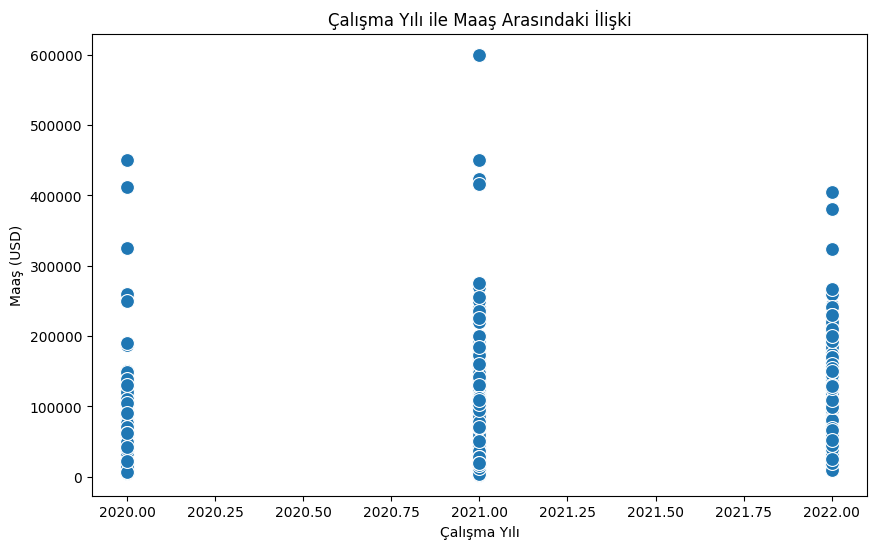

In [9]:
plt.figure(figsize=(10, 6))  # Grafiğin boyutunu ayarla
sns.scatterplot(x='work_year', y='salary_in_usd', data=data, s=100) # buradaki s noktaların piksel cinsinden kare alanıdır

# Başlık ve eksen etiketlerini ekle
plt.title('Çalışma Yılı ile Maaş Arasındaki İlişki')
plt.xlabel('Çalışma Yılı')
plt.ylabel('Maaş (USD)')

# Grafiği gösterelim
plt.show()


# sns.FacetGrid fonksiyonu ile bir ızgara oluşturup, map metodu ile her bir alt grafiğe histogram çizdirelim.

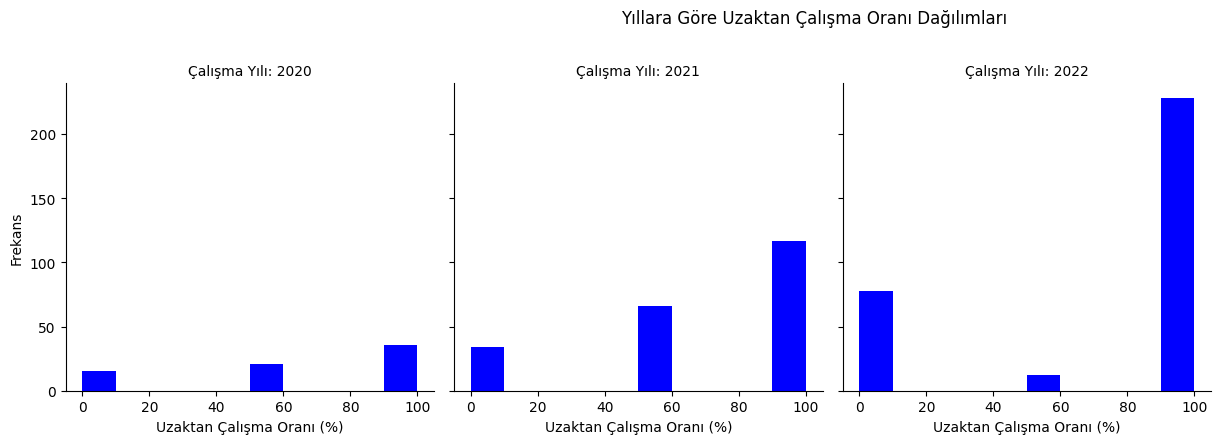

In [10]:
g = sns.FacetGrid(data, col="work_year", col_wrap=4, height=4)
g.map(plt.hist, 'remote_ratio', bins=10, color='blue')

g.fig.suptitle('Yıllara Göre Uzaktan Çalışma Oranı Dağılımları', x = 0.5, y=1.1)

# Eksen etiketleri
g.set_axis_labels('Uzaktan Çalışma Oranı (%)', 'Frekans')
g.set_titles('Çalışma Yılı: {col_name}')

plt.show()